# Environment Custom

Códigos aprendidos no tutorial: https://www.youtube.com/watch?v=G92TF4xYQcU&list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7&index=4

In [1]:
#!pip install opencv-python
#!pip install pillow

In [7]:
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import time

In [8]:
style.use("ggplot")

SIZE = 10
HM_EPISODES = 25000
MOVE_PENALTY = 1
ENEMY_PENALTY = 300
FOOD_REWARD = 25
epsilon = 0.9
EPS_DEACY = 0.9998
SHOW_EVERY = 3000

start_q_table = None #or filename

LEARNING_RATE = 0.1
DISCOUNT = 0.95

PLAYER_N = 1
FOOD_N = 2
ENEMY_N = 3

d = {1: (255, 175, 0),
    2: (0, 255, 0),
    3: (0, 0, 255)}

episode_rewards = []

In [9]:
class Blob():
    
    def __init__(self):
        self.x = np.random.randint(0, SIZE)
        self.y = np.random.randint(0, SIZE)
        
    def __str__(self):
        return f"{self.x},{self.y}"
    
    def __sub__(self, other):
        return (self.x - other.x, self.y - other.y)
    
    def action(self, choice):
        #o agente se move apenas na diagonal
        if (choice == 0):
            self.move(x=1, y=1)
        elif (choice == 0):
            self.move(x=-1, y=-1)
        elif (choice == 0):
            self.move(x=-1, y=1)
        elif (choice == 0):
            self.move(x=1, y=-1)
    
    def move(self, x=False, y=False):
        if not x:
            self.x += np.random.randint(-1, 2)
        else:
            self.x += x
        if not y:
            self.y += np.random.randint(-1, 2)
        else:
            self.y += y
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE -1:
            self.x = SIZE -1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE -1:
            self.y = SIZE -1


In [10]:
if start_q_table is None:
    q_table = {}
    for x1 in range(-SIZE+1, SIZE):
        for y1 in range(-SIZE+1, SIZE):
            for x2 in range(-SIZE+1, SIZE):
                for y2 in range(-SIZE+1, SIZE):
                    q_table[((x1,y1),(x2,y2))] = [np.random.uniform(-5,0) for i in range(4)]
else:
    with open(start_q_table, 'rb') as f:
        q_table = pickle.load(f)

on # 0, epsilon: 0.9
3000 ep mean nan


c:\Users\windows\anaconda3\envs\ExemploGym\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\windows\anaconda3\envs\ExemploGym\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


on # 3000, epsilon: 0.49390083359356435
3000 ep mean nan
on # 6000, epsilon: 0.27104225936046566
3000 ep mean -550.3313333333333
on # 9000, epsilon: 0.14874221981913022
3000 ep mean -513.8325
on # 12000, epsilon: 0.08162656262136181
3000 ep mean -513.3865555555556
on # 15000, epsilon: 0.044794919246742226
3000 ep mean -488.6639166666667
on # 18000, epsilon: 0.024582497729691496
3000 ep mean -465.1526
on # 21000, epsilon: 0.01349035124500733
3000 ep mean -434.626
on # 24000, epsilon: 0.0074032174726434705
3000 ep mean -410.09785714285715


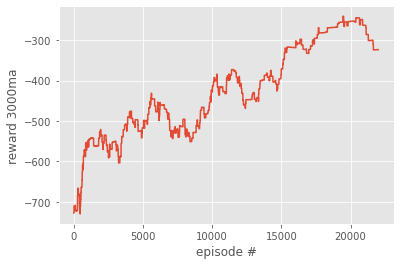

In [11]:
for episode in range(HM_EPISODES):
    player = Blob()
    food = Blob()
    enemy = Blob()
    if episode % SHOW_EVERY == 0:
        print(f"on # {episode}, epsilon: {epsilon}")
        print(f"{SHOW_EVERY} ep mean {np.mean(episode_rewards[SHOW_EVERY:])}")
        show = True
    else:
        show = False
    
    episode_reward = 0
    for i in range(200):
        obs = (player-food, player-enemy)
        if np.random.random() > epsilon:
            action = np.argmax(q_table[obs])
        else:
            action = np.random.randint(0, 4)
    
        player.action(action)
    
        ## maybe later
        #
        #enemy.move()
        #food.move()
        #
        ###############
    
        if player.x == enemy.x and player.y == enemy.y:
            reward = -ENEMY_PENALTY
        elif player.x == food.x and player.y == food.y:
            reward = FOOD_REWARD
        else:
            reward = -MOVE_PENALTY

        new_obs = (player-food, player-enemy)
        max_future_q = np.max(q_table[new_obs])
        current_q = q_table[obs][action]

        if reward == FOOD_REWARD:
            new_q = FOOD_REWARD
        elif reward == -ENEMY_PENALTY:
            new_q = -ENEMY_PENALTY
        else:
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        q_table[obs][action] = new_q

        if show:
            env = np.zeros((SIZE, SIZE, 3), dtype = np.uint8)
            env[food.x][food.y] = d[FOOD_N]
            env[player.x][player.y] = d[PLAYER_N]
            env[enemy.x][enemy.y] = d[ENEMY_N]

            img = Image.fromarray(env, "RGB")
            img = img.resize((300, 300))
            cv2.imshow("", np.array(img))
            if reward == FOOD_REWARD or reward == ENEMY_PENALTY:
                if cv2.waitKey(500) & 0xFF == ord("q"):
                    break
            else:
                if cv2.waitKey(1) & 0xFF == ord("q"):
                    break

        episode_reward += reward
        if reward == FOOD_REWARD or reward == ENEMY_PENALTY:
            break
        
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DEACY
    
    
moving_avg = np.convolve(episode_rewards, np.ones((SHOW_EVERY,)) / SHOW_EVERY, mode="valid")
plt.plot([i for i in range(len(moving_avg))], moving_avg)
plt.ylabel(f"reward {SHOW_EVERY}ma")
plt.xlabel("episode #")
plt.show()

with open (f"qtable-{int(time.time())}.pickle", "wb") as f:
    pickle.dump(q_table, f) 
    
cv2.destroyAllWindows()